# Make Dynamite Plot

In [19]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/optimizer/analysis/tract_vs_map/merged_dice_tract.csv'
sheet = None #'master_list_proper_subjects' ?

In [20]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=None, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,Subject,Axial,Average_Dice_Coefficient
0,sub-CbctDbs0044,2,0.387583
1,sub-CbctDbs0045,1,0.027436
2,sub-CbctDbs0046,1,0.334217
3,sub-CbctDbs0047,-1,0.016398
4,sub-CbctDbs0048,1,0.641249
...,...,...,...
95,sub-CbctDbs0305,0,0.075133
96,sub-CbctDbs0307,0,0.000896
97,sub-CbctDbs0311,-1,0.033880
98,sub-CbctDbs0312,-1,0.125567



# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [21]:
len(data_df['study'].unique())

KeyError: 'study'

In [22]:
data_df.columns

Index(['Subject', 'Axial', 'Average_Dice_Coefficient'], dtype='object')

In [23]:
drop_list = ['Axial', 'Average_Dice_Coefficient']

In [24]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,Subject,Axial,Average_Dice_Coefficient
0,sub-CbctDbs0044,2,0.387583
1,sub-CbctDbs0045,1,0.027436
2,sub-CbctDbs0046,1,0.334217
3,sub-CbctDbs0047,-1,0.016398
4,sub-CbctDbs0048,1,0.641249
...,...,...,...
95,sub-CbctDbs0305,0,0.075133
96,sub-CbctDbs0307,0,0.000896
97,sub-CbctDbs0311,-1,0.033880
98,sub-CbctDbs0312,-1,0.125567


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [25]:
data_df.columns

Index(['Subject', 'Axial', 'Average_Dice_Coefficient'], dtype='object')

In [26]:
data_df.Disease.unique()

AttributeError: 'DataFrame' object has no attribute 'Disease'

In [27]:
column = 'Axial'  # The column you'd like to evaluate
condition = 'equal'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 0 # The value to compare against

In [28]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,Subject,Axial,Average_Dice_Coefficient
0,sub-CbctDbs0044,2,0.387583
1,sub-CbctDbs0045,1,0.027436
2,sub-CbctDbs0046,1,0.334217
3,sub-CbctDbs0047,-1,0.016398
4,sub-CbctDbs0048,1,0.641249
...,...,...,...
91,sub-CbctDbs0294,1,0.074853
92,sub-CbctDbs0298,1,0.002774
93,sub-CbctDbs0300,-1,0.146660
97,sub-CbctDbs0311,-1,0.033880


In [10]:
data_df_sorted = data_df.sort_values(by='Location')
data_df_sorted

KeyError: 'Location'

Regress out Covariates

In [11]:
data_df.columns

Index(['Subject', 'Axial', 'Average_Dice_Coefficient'], dtype='object')

In [ ]:
dependent_variable_list = ['Pre_Post_Memory_Effect_Size__Cohen_s_D_']
regressors = ['Disease', 'Years_Between_Measurements', 'Mean_Age', 'Closed_Loop']

In [ ]:
#Impute covariates in if desired
for col in regressors:
    if data_df[col].dtype == 'O':  # object/categorical
        data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
    else:  # numeric
        data_df[col] = data_df[col].fillna(data_df[col].mean())
data_df[regressors].isna().sum()

In [ ]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
print(adjusted_dep_vars_list)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
data_df.columns

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['TOTAL11']

In [ ]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)

Do Miscellaneous Data Cleaning

In [ ]:
# data_df = data_df[(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] >= -1) & (data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] <= 1)]

In [29]:
data_df.columns

Index(['Subject', 'Axial', 'Average_Dice_Coefficient'], dtype='object')

In [30]:
import numpy as np
data_df['sign'] = np.where(data_df['Axial'] > 0, 1, 0)
data_df['sign']

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_5884/3245663311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['sign'] = np.where(data_df['Axial'] > 0, 1, 0)


0     1
1     1
2     1
3     0
4     1
     ..
91    1
92    1
93    0
97    0
98    0
Name: sign, Length: 70, dtype: int64

# Generate the Plot

In [31]:
data_df.columns

Index(['Subject', 'Axial', 'Average_Dice_Coefficient', 'sign'], dtype='object')

In [32]:
x_col = 'sign'
y_col = 'Average_Dice_Coefficient'

In [33]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/optimizer/analysis/gait_decline/tract'

/Users/cu135/Software_Local/calvin_utils_project/calvin_utils_project/calvin_utils/statistical_utils/dynamite_plot.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=means.index, y=means.values, palette=self.bar_palette, ci=None)


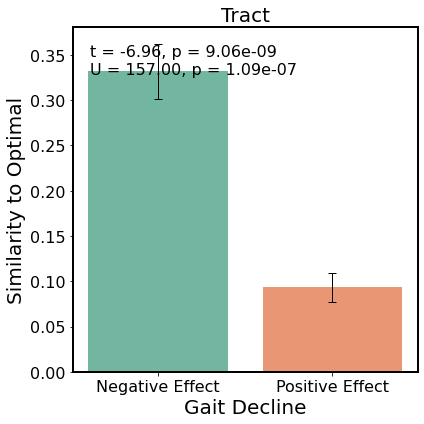

In [35]:
from calvin_utils.statistical_utils.dynamite_plot import DynamitePlotter
plotter = DynamitePlotter()
plotter.plot(
    df=data_df,
    xlabel="Gait Decline",
    ylabel="Similarity to Optimal",
    group_col=x_col,
    y_col=y_col,
    dataset_name='Tract',
    out_dir=out_dir
)